In [52]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ, assemble, transpile
from qiskit.compiler import transpile, assemble
from qiskit import QuantumRegister, ClassicalRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from iqx import *
""
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-05-30 00:56:42,352: Credentials are already in use. The existing account in the session will be replaced.


In [54]:
def one_circle(n):
    num_qubits = n
    qr = QuantumRegister(num_qubits)
    cr = ClassicalRegister(num_qubits)
    qc = QuantumCircuit(qr)
    qc.u(6.282423018161765, 5.130898769846667, 0.8076787993563528, 0)
    qc.u(0.02892958785495381, 5.138065901196583, 5.149438595478664, 1)
    qc.u(3.147853199057998, 1.2974588957830662, 2.970517262236754, 2)
    qc.cx(0, 1)
    qc.rx(1.5707963267948966, 0)
    qc.rz(3.141606837592718, 0)
    qc.rx(1.5707963267948966, 0)
    qc.rz(1.0010165576004795, 0)
    qc.u(1.2281440376615933, 1.5968313621021224, 5.555196993225152, 1)
    qc.cx(0, 1)
    qc.rx(1.5707963267948966, 0)
    qc.rz(3.141668043653471, 0)
    qc.rx(1.5707963267948966, 0)
    qc.rz(1.7357092718313396, 0)
    qc.u(1.9286234684427228, 3.3820841492249656, 3.00867748873177, 1)
    qc.cx(1, 2)
    qc.rx(1.5707963267948966, 1)
    qc.rz(3.141869004062471, 1)
    qc.rx(1.5707963267948966, 1)
    qc.rz(4.0864197028319165, 1)
    qc.u(4.756333958061099, 0.1587859495475623, 4.638168400163111, 2)
    qc.cx(0, 1)
    qc.rx(1.5707963267948966, 0)
    qc.rz(0.09519990186965188, 0)
    qc.rx(1.5707963267948966, 0)
    qc.rz(3.1415724545604764, 0)
    qc.u(3.095317611205438, 4.317417726522305, 3.536897827314391, 1)
    qc.cx(1, 2)
    qc.rx(1.5707963267948966, 1)
    qc.rz(3.1592436564790347, 1)
    qc.rx(1.5707963267948966, 1)
    qc.rz(5.492220259800783, 1)
    qc.u(3.2127830764132668, 3.2281841257514117, 4.878857125341, 2)
    qc.cx(1, 2)
    qc.rx(1.5707963267948966, 1)
    qc.rz(1.5701650233464477, 1)
    qc.rx(1.5707963267948966, 1)
    qc.rz(3.661050672592644, 1)
    qc.u(1.263457946670556, 5.679735341536812, 4.37400404460525, 2)
    qc.cx(1, 2)
    qc.rx(1.5707963267948966, 1)
    qc.rz(4.643099824104432, 1)
    qc.rx(1.5707963267948966, 1)
    qc.rz(3.2194108808767865, 1)
    qc.u(2.1763053660676803, 4.4970024188581945, 1.0984632811599795, 2)
    qc.cx(0, 1)
    qc.rx(1.5707963267948966, 0)
    qc.rz(3.046383811775037, 0)
    qc.rx(1.5707963267948966, 0)
    qc.rz(3.9225795523300135, 0)
    qc.u(4.623633595539822, 6.228330241214273, 1.019694209638054, 1)
    qc.cx(0, 1)
    qc.rx(1.5707963267948966, 0)
    qc.rz(6.2823573671662345, 0)
    qc.rx(1.5707963267948966, 0)
    qc.rz(5.639532287286478, 0)
    qc.u(4.447312069828833, 2.5885135105924846, 0.8839561660043884, 1)
    qc.cx(1, 2)
    qc.rx(1.5707963267948966, 1)
    qc.rz(1.5705473512097599, 1)
    qc.rx(1.5707963267948966, 1)
    qc.rz(0.00014459235495678513, 1)
    qc.u(3.166974438214716, 2.2014500922430216, 3.7720420213965262, 2)
    qc.cx(1, 2)
    qc.rx(1.5707963267948966, 1)
    qc.rz(4.7124753657071565, 1)
    qc.rx(1.5707963267948966, 1)
    qc.rz(0.772673245903718, 1)
    qc.u(2.256234210237075, 0.38852850706755504, 6.267702350039897, 2)
    return qc

Traceback (most recent call last):
  File "<ipython-input-61-b0d006b66748>", line 16, in <module>
    answer = results.get_counts()
  File "/opt/conda/lib/python3.8/site-packages/qiskit/result/result.py", line 281, in get_counts
    raise QiskitError('No counts for experiment "{}"'.format(repr(key)))
QiskitError: 'No counts for experiment "0"'

Use %tb to get the full traceback.


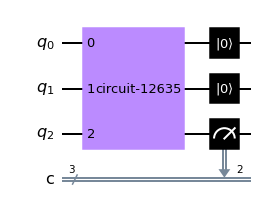

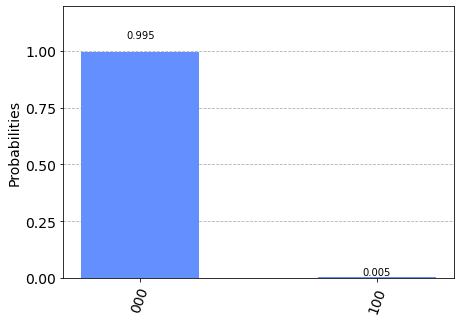

In [61]:
#one_circle(3).draw()
n = 3
circle_gate = one_circle(n)
all_circuit = all_circle(circle_gate,n,1)
all_circuit.draw()

transpiled_dj_circuit = transpile(all_circuit, qasm_sim)
qobj = assemble(transpiled_dj_circuit)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

qasm_sim = Aer.get_backend('qasm_simulator')
qobj = assemble(one_circle(3), qasm_sim)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()
#plot_histogram(answer)

In [56]:
def all_circle(circle, n, ncy):
    qc = QuantumCircuit(n,n)
    for i in range(ncy):
        qc.append(circle,range(n))
        for j in range(n-1):
            qc.reset(j)
    #for i in range(n):
    #    qc.measure(i,i)
    qc.measure(n-1,n-1)
    return qc

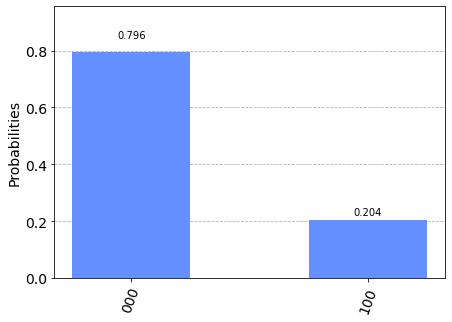

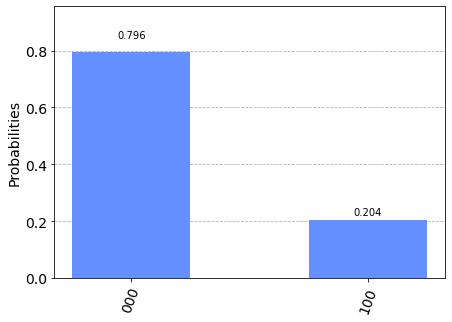

In [60]:
n = 3
circle_gate = one_circle(n)
all_circuit = all_circle(circle_gate,n,100)
#all_circuit.draw()
qasm_sim = Aer.get_backend('qasm_simulator')
shots = 1024
transpiled_dj_circuit = transpile(all_circuit, qasm_sim)
qobj = assemble(transpiled_dj_circuit)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

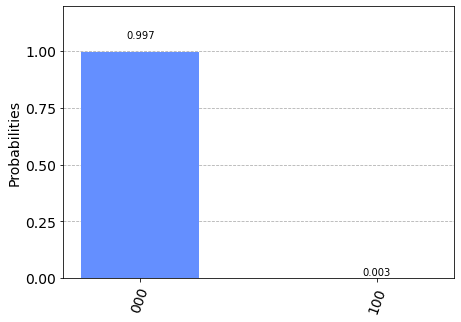

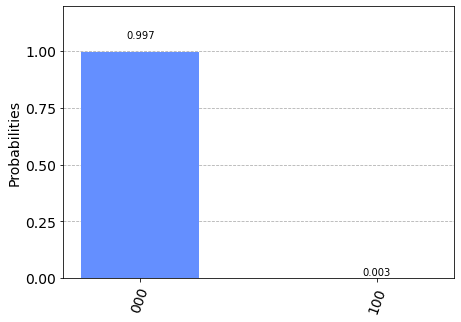

In [58]:
qasm_sim = Aer.get_backend('qasm_simulator')
shots = 1024
transpiled_dj_circuit = transpile(all_circuit, qasm_sim)
qobj = assemble(transpiled_dj_circuit)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

In [112]:
all_circuit.measure_all()
from qiskit.visualization import plot_histogram
qasm_sim = Aer.get_backend('qasm_simulator')
shots = 1024
qobj = assemble(all_circuit, qasm_sim)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

Simulation failed and returned the following error message:
ERROR:  [Experiment 0] Circuit contains invalid instructions {"gates": {circuit-139}} for "density_matrix" method


Traceback (most recent call last):
  File "<ipython-input-112-42e66c2b8aad>", line 7, in <module>
    answer = results.get_counts()
  File "/opt/conda/lib/python3.8/site-packages/qiskit/result/result.py", line 263, in get_counts
    exp = self._get_experiment(key)
  File "/opt/conda/lib/python3.8/site-packages/qiskit/result/result.py", line 387, in _get_experiment
    raise QiskitError(result_status, ", ", exp_status)
QiskitError: 'ERROR:  [Experiment 0] Circuit contains invalid instructions {"gates": {circuit-139}} for "density_matrix" method ,  ERROR: Circuit contains invalid instructions {"gates": {circuit-139}} for "density_matrix" method'

Use %tb to get the full traceback.
